A good suggestion for viewing the parse tree is to use the `prettify()` method, which turns a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string. Due to its considerable length, we will only print the first 1500 characters.

In [2]:
pip install selenium webdriver_manager

# Web Scraping with Selenium: A Detailed Explanation

This project uses **Selenium** to scrape dynamic data from `companiesmarketcap.com`. Below is a step-by-step guide and an explanation of why Selenium is necessary.

## Why Selenium and Not BeautifulSoup?

**BeautifulSoup** alone won’t work for this project due to several limitations:

1. **JavaScript Execution**: 
   - BeautifulSoup can only see the static HTML, so it doesn’t render JavaScript.
2. **Dynamic Data Loading**:
   - The site likely uses JavaScript to load data, which BeautifulSoup can't capture.
3. **Anti-Scraping Protection**:
   - Websites can detect simple requests and might need headers, cookies, or even browser fingerprinting.

> **Why Selenium Works Better**:
> Selenium controls an actual browser, allowing it to:
> - Render JavaScript
> - Wait for elements to fully load
> - Interact with the page like a real user

### **1. Importing Libraries**

In [5]:
from selenium import webdriver  # Importing Selenium for browser automation
from selenium.webdriver.common.by import By  # Importing 'By' for locating elements
from selenium.webdriver.support.ui import WebDriverWait  # Importing WebDriverWait for waiting until elements load
from selenium.webdriver.support import expected_conditions as EC  # Importing expected_conditions to specify wait conditions
from selenium.webdriver.chrome.service import Service  # Importing Service for ChromeDriver configuration
from selenium.webdriver.chrome.options import Options  # Importing Options for setting up Chrome options
import json  # Importing json module to save data to a JSON file
import time  # Importing time module for sleep intervals

### **2. Setting Up the WebDriver**
This function configures the Chrome WebDriver with specific options.

In [7]:
def setup_driver():
    """
    Set up and return a Chrome WebDriver instance with specified options.
    """
    chrome_options = Options()
    chrome_options.add_argument('--headless')  # Run in headless mode
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    
    driver = webdriver.Chrome(options=chrome_options)  # Initialize driver with options
    return driver


### **Step 3: Scraping Company Data**


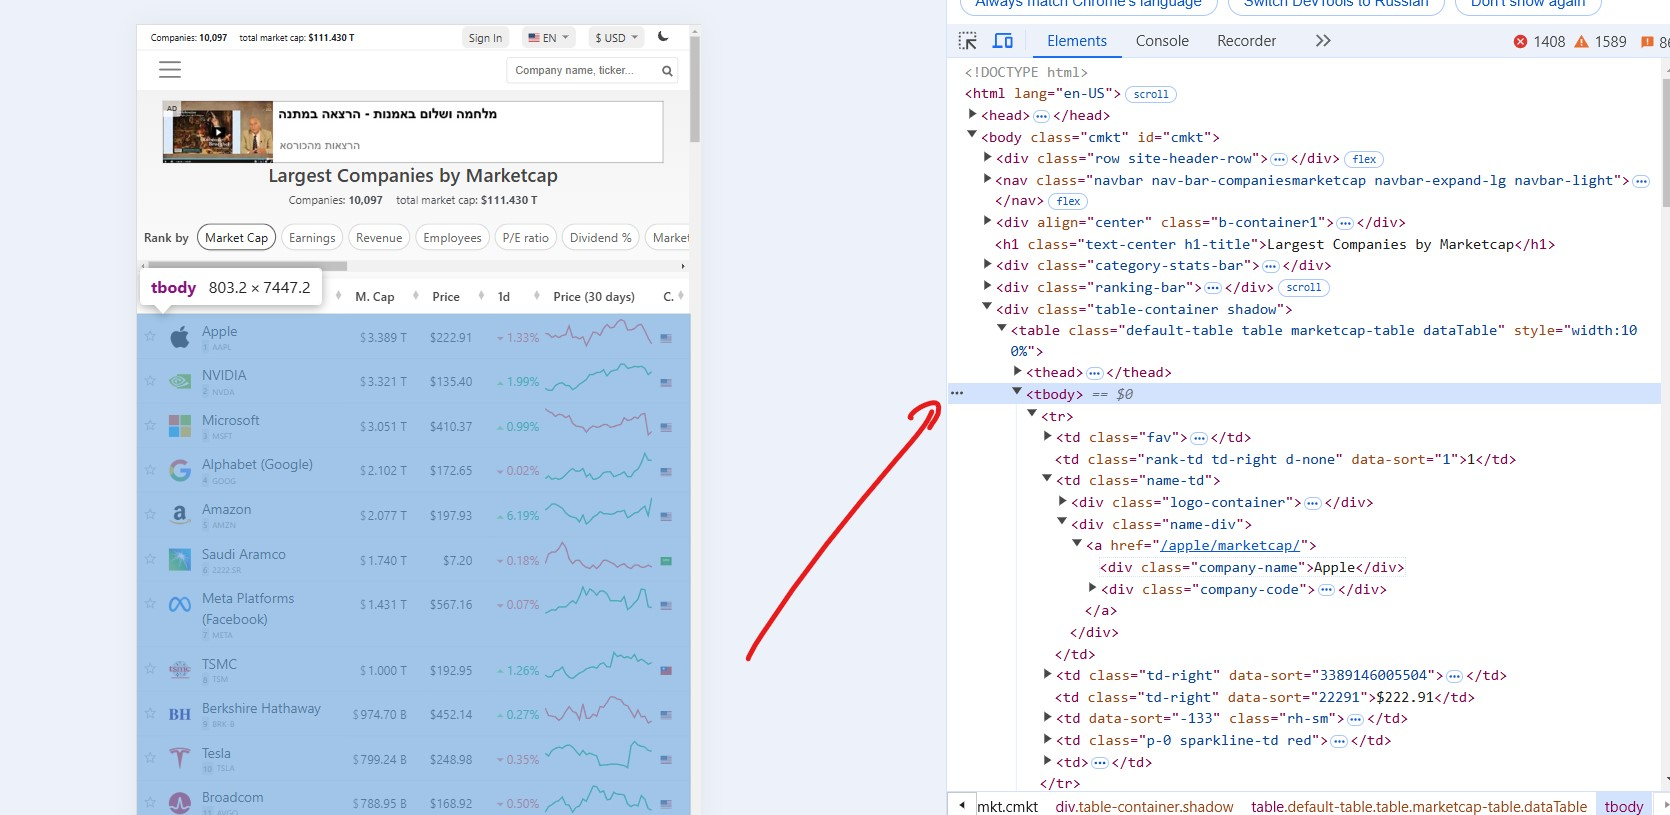

In [9]:
from IPython.display import Image

# Display image
Image(filename="body.jpg")


### **The scrape_companies function visits the target URL and scrapes each company’s data, including its name, market cap, and price.**

**Loading the Page**
-The driver navigates to the target URL.

**Waiting for Table to Load**
-I use WebDriverWait to pause until the table element is fully loaded.

**Extracting Data from Rows**
-Each row in the table is processed to retrieve specific details.

In [11]:
def scrape_companies():
    """
    Scrapes company data from companiesmarketcap.com using Selenium with index-based selectors
    """
    url = "https://companiesmarketcap.com/"
    driver = setup_driver()
    companies = []
    
    try:
        print("Loading page...")
        driver.get(url)
        
        # Wait until the table loads
        wait = WebDriverWait(driver, 20)
        table = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody")))
        
        # Additional wait for data to fully load
        time.sleep(5)
        
        # Find all rows in the table
        rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")
        print(f"Found {len(rows)} rows")
        
        for row in rows:
            try:
                # Company name - first div with class company-name
                name_element = row.find_element(By.CSS_SELECTOR, "div.company-name")
                company_name = name_element.text.strip()
                
                # Company code (ticker) - div with class company-code
                try:
                    code_element = row.find_element(By.CSS_SELECTOR, "div.company-code")
                    company_code = code_element.text.strip()
                except:
                    company_code = "N/A"
                
                # Market cap - second td-right class element
                try:
                    market_elements = row.find_elements(By.CSS_SELECTOR, "td.td-right")
                    market_cap = market_elements[1].text.strip() if len(market_elements) > 1 else "N/A"
                except:
                    market_cap = "N/A"
                
                # Price - third td-right class element
                try:
                    price = market_elements[2].text.strip() if len(market_elements) > 2 else "N/A"
                except:
                    price = "N/A"
                
                # Country - span with class responsive-hidden
                try:
                    country_element = row.find_element(By.CSS_SELECTOR, "span.responsive-hidden")
                    country = country_element.text.strip()
                except:
                    country = "N/A"
                
                companies.append({
                    "name": company_name,
                    "company_code": company_code,
                    "market_cap": market_cap,
                    "price": price,
                    "country": country
                })
                
                print(f"Scraped: {company_name}")
                
            except Exception as e:
                print(f"Error parsing row: {e}")
                continue
        
        return companies
        
    except Exception as e:
        print(f"Error during scraping: {e}")
        return []
        
    finally:
        driver.quit()


### **4. Saving Data to JSON**
The save_to_json function saves the scraped data in a JSON file for future use.


In [13]:
def save_to_json(companies, filename="companies_data.json"):
    """
    Saves the scraped data to a JSON file with proper formatting
    """
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(companies, f, indent=4, ensure_ascii=False)
        print(f"Data saved to {filename}")

In [14]:
# Add this function to print a sample of the data
def print_sample_data(companies, num_samples=3):
    """
    Prints a sample of the scraped data for verification
    """
    print("\nSample of scraped data:")
    for i, company in enumerate(companies[:num_samples]):
        print(f"\nCompany {i+1}:")
        for key, value in company.items():
            print(f"{key}: {value}")

### **5. Main Program Execution**
The main block of the code starts the scraping process, saves the data to a JSON file, and prints a sample of the data.

In [16]:
if __name__ == "__main__":
    print("Starting scraper...")
    companies_data = scrape_companies()
    
    if companies_data:
        save_to_json(companies_data)
        print_sample_data(companies_data)  # Print sample for verification
        print(f"\nSuccessfully scraped {len(companies_data)} companies")
    else:
        print("No data was scraped")

Starting scraper...
Loading page...
Found 102 rows
Scraped: Apple
Scraped: Microsoft
Scraped: NVIDIA
Scraped: Amazon
Scraped: Alphabet (Google)
Scraped: Saudi Aramco
Scraped: Meta Platforms (Facebook)
Scraped: Berkshire Hathaway
Scraped: Tesla
Scraped: TSMC
Scraped: Broadcom
Scraped: Eli Lilly
Scraped: Walmart
Scraped: JPMorgan Chase
Scraped: Visa
Scraped: Tencent
Scraped: Exxon Mobil
Error parsing row: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div.company-name"}
  (Session info: chrome=134.0.6998.178); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF620654C25+3179557]
	(No symbol) [0x00007FF6202B88A0]
	(No symbol) [0x00007FF6201491CA]
	(No symbol) [0x00007FF62019FA67]
	(No symbol) [0x00007FF62019FC9C]
	(No symbol) [0x00007FF62019240C]
	(No symbol) [0x00007FF6201C7C6F]
	(No symbol) [0x00007FF6201922D6]
	

In [17]:
import pandas as pd
import json

In [18]:
filename = "companies_data.json"  # Укажите путь к вашему файлу JSON
with open(filename, 'r', encoding='utf-8') as f:
    data = json.load(f)
    
# Преобразуем данные в DataFrame
df = pd.DataFrame(data)
df.head()


,name,company_code,market_cap,price,country
0,Apple,AAPL,$3.334 T,$222.00,USA
1,Microsoft,MSFT,$2.829 T,$380.64,USA
2,NVIDIA,NVDA,$2.656 T,$108.86,USA
3,Amazon,AMZN,$2.029 T,$191.48,USA
4,Alphabet (Google),GOOG,$1.920 T,$158.41,USA


### **Scraping Multiple Pages**
***Scraping multiple pages adds a bit of complexity. The main difference from scraping a single page is that we need to make a new request for each page individually. To accomplish this, we’ll use a for loop.****

***By examining the URLs for the first few pages, we can see that the only part of the URL that changes is the page number at the end (highlighted in orange in the image below). This means we only need to adjust one part of the URL as the for loop iterates through the pages.***

Here’s how it works:

 - Set Up the Base URL: Define the URL structure, where the page number is a variable.
 - Loop Through Pages: Use a for loop to iterate over page numbers, modifying the URL for each request.
 - Scrape Data from Each Page: For each URL generated, make a request, parse the content, and collect the data.
 - This approach allows you to efficiently scrape data across multiple pages by only changing a single parameter in the URL.


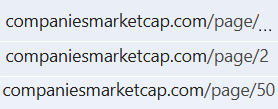

In [20]:

# Display image
Image(filename="pages.jpg")

In [21]:
import time
import random
from selenium.common.exceptions import TimeoutException, WebDriverException, StaleElementReferenceException
from urllib3.exceptions import ReadTimeoutError
from requests.exceptions import RequestException

def setup_driver():
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    # Add timeout settings
    options.add_argument('--page-load-timeout=30')
    driver = webdriver.Chrome(options=options)
    driver.set_page_load_timeout(30)
    return driver

def scrape_page(driver, url, max_retries=3):
    """
    Scrapes a single page with retries
    """
    for attempt in range(max_retries):
        try:
            print(f"Loading page: {url} (Attempt {attempt + 1}/{max_retries})")
            
            # Clear browser data
            driver.delete_all_cookies()
            
            # Load page
            driver.get(url)
            
            # Wait until the table loads
            wait = WebDriverWait(driver, 20)
            table = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table tbody")))
            
            # Additional wait for data to fully load
            time.sleep(5)
            
            # Find all rows in the table
            rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")
            print(f"Found {len(rows)} rows")
            
            page_companies = []
            for row in rows:
                try:
                    # Company name
                    name_element = row.find_element(By.CSS_SELECTOR, "div.company-name")
                    company_name = name_element.text.strip()
                    
                    # Company code
                    try:
                        code_element = row.find_element(By.CSS_SELECTOR, "div.company-code")
                        company_code = code_element.text.strip()
                    except:
                        company_code = "N/A"
                    
                    # Market cap
                    try:
                        market_elements = row.find_elements(By.CSS_SELECTOR, "td.td-right")
                        market_cap = market_elements[1].text.strip() if len(market_elements) > 1 else "N/A"
                    except:
                        market_cap = "N/A"
                    
                    # Price
                    try:
                        price = market_elements[2].text.strip() if len(market_elements) > 2 else "N/A"
                    except:
                        price = "N/A"
                    
                    # Country
                    try:
                        country_element = row.find_element(By.CSS_SELECTOR, "span.responsive-hidden")
                        country = country_element.text.strip()
                    except:
                        country = "N/A"
                    
                    page_companies.append({
                        "name": company_name,
                        "company_code": company_code,
                        "market_cap": market_cap,
                        "price": price,
                        "country": country
                    })
                    
                except (StaleElementReferenceException, Exception) as e:
                    print(f"Error parsing row: {e}")
                    continue
            
            return page_companies
            
        except (TimeoutException, WebDriverException, ReadTimeoutError, RequestException) as e:
            print(f"Attempt {attempt + 1} failed: {str(e)}")
            if attempt < max_retries - 1:
                print(f"Waiting 30 seconds before retry...")
                time.sleep(30)
                # Restart driver on failure
                try:
                    driver.quit()
                except:
                    pass
                driver = setup_driver()
            else:
                print("Max retries reached, skipping page")
                return []

def scrape_companies():
    """
    Scrapes company data from all pages with improved error handling
    """
    all_companies = []
    num_pages = 62
    current_driver = setup_driver()
    
    try:
        # Try to load last saved progress
        try:
            df = pd.read_csv('companies_market_cap_progress.csv')
            all_companies = df.to_dict('records')
            start_page = len(all_companies) // 100 + 1
            print(f"Resuming from page {start_page}")
        except:
            start_page = 1
        
        for page in range(start_page, num_pages + 1):
            try:
                url = "https://companiesmarketcap.com/" if page == 1 else f"https://companiesmarketcap.com/page/{page}/"
                print(f"\nProcessing page {page}/{num_pages}")
                
                # Scrape the page with retry mechanism
                page_companies = scrape_page(current_driver, url)
                
                if page_companies:  # Only extend if we got data
                    # Add companies from this page to main list
                    all_companies.extend(page_companies)
                    
                    # Save progress after each page
                    df = pd.DataFrame(all_companies)
                    df.to_csv('companies_market_cap_progress.csv', index=False)
                
                # Random delay between pages
                if page < num_pages:
                    delay = random.uniform(10, 15)
                    print(f"\nWaiting {delay:.2f} seconds before next page...")
                    time.sleep(delay)
                
            except Exception as e:
                print(f"Error on page {page}: {e}")
                # Save progress before attempting next page
                df = pd.DataFrame(all_companies)
                df.to_csv('companies_market_cap_progress.csv', index=False)
                
                # Wait before continuing
                time.sleep(30)
                
                # Try to restart driver
                try:
                    current_driver.quit()
                except:
                    pass
                current_driver = setup_driver()
        
        return all_companies
        
    except Exception as e:
        print(f"Error during scraping: {e}")
        return all_companies
        
    finally:
        try:
            current_driver.quit()
        except:
            pass

def main():
    print("Starting scraping process...")
    start_time = time.time()
    
    companies = scrape_companies()
    
    # Save final results
    df = pd.DataFrame(companies)
    df.to_csv('companies_market_cap_final.csv', index=False)
    
    # Print summary
    total_time = time.time() - start_time
    print("\nScraping completed!")
    print(f"Total companies scraped: {len(companies)}")
    print(f"Total time taken: {total_time/60:.1f} minutes")
    print("Data saved to 'companies_market_cap_final.csv'")

if __name__ == "__main__":
    main()

Starting scraping process...
Resuming from page 63

Scraping completed!
Total companies scraped: 6200
Total time taken: 0.1 minutes
Data saved to 'companies_market_cap_final.csv'


In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

def get_soup_selenium(url, driver):
    """Get BeautifulSoup object using Selenium"""
    driver.get(url)
    time.sleep(random.uniform(3, 5))  # Wait for the page to fully load
    return BeautifulSoup(driver.page_source, 'html.parser')

def scrape_page(url, driver):
    """Scrape a single page using Selenium"""
    soup = get_soup_selenium(url, driver)
    if not soup:
        return []

    companies = []
    table = soup.find('tbody')
    if not table:
        print("Warning: No table found on page.")
        return []

    for row in table.find_all('tr'):
        try:
            # Company name
            name_div = row.find('div', {'class': 'company-name'})
            company_name = name_div.text.strip() if name_div else "N/A"

            # Ticker
            code_div = row.find('div', {'class': 'company-code'})
            company_code = code_div.text.strip() if code_div else "N/A"

            # Market Cap
            td_rights = row.find_all('td', {'class': 'td-right'})
            market_cap = td_rights[1].text.strip() if len(td_rights) > 1 else "N/A"

            # Price
            price = td_rights[2].text.strip() if len(td_rights) > 2 else "N/A"

            # Daily Change
            spans = row.find_all('span')
            daily_change = spans[1].text.strip() if len(spans) > 1 else "N/A"

            # Country
            country = "N/A"
            country_span = row.find('span', {'class': 'responsive-hidden'})
            if country_span and country_span.text.strip().isalpha():
                country = country_span.text.strip()

            # Alternative method: try to get country from flag image alt text
            flag_img = row.find('img', {'class': 'flag'})
            if not country or country == "N/A":
                country = flag_img.get('alt', 'N/A') if flag_img else "N/A"

            companies.append({
                'name': company_name,
                'company_code': company_code,
                'market_cap': market_cap,
                'price': price,
                'daily_change': daily_change,
                'country': country
            })

        except Exception as e:
            print(f"Error parsing row: {str(e)}")
            continue

    return companies

def scrape_companies():
    """Main scraping function using Selenium"""
    all_companies = []
    num_pages = 62  # Total number of pages to scrape

    # Initialize Selenium WebDriver
    service = Service('D:/chromedriver-win64/chromedriver.exe') 
    driver = webdriver.Chrome(service=service)

    try:
        # Try to load last saved progress
        try:
            df = pd.read_csv('companies_market_cap_progress.csv')
            all_companies = df.to_dict('records')
            start_page = len(all_companies) // 100 + 1
            print(f"Resuming from page {start_page}")
        except:
            start_page = 1

        for page in range(start_page, num_pages + 1):
            try:
                url = "https://companiesmarketcap.com/" if page == 1 else f"https://companiesmarketcap.com/page/{page}/"
                print(f"\nProcessing page {page}/{num_pages}")

                page_companies = scrape_page(url, driver)

                if page_companies:
                    all_companies.extend(page_companies)
                    
                    # Save progress every 5 pages
                    if page % 5 == 0 or page == num_pages:
                        df = pd.DataFrame(all_companies)
                        df.to_csv('companies_market_cap_progress.csv', index=False)
                        print(f"Progress saved after page {page}")

                # Random delay between pages
                if page < num_pages:
                    delay = random.uniform(10, 15)
                    print(f"Waiting {delay:.2f} seconds before next page...")
                    time.sleep(delay)

            except Exception as e:
                print(f"Error on page {page}: {str(e)}")
                time.sleep(30)

    except Exception as e:
        print(f"Error during scraping: {str(e)}")

    finally:
        driver.quit()  # Закрыть браузер после завершения скрапинга

    return all_companies

def main():
    print("Starting scraping process...")
    start_time = time.time()

    companies = scrape_companies()

    # Save final results
    df = pd.DataFrame(companies)
    df.to_csv('companies_market_cap_final.csv', index=False)

    # Print summary
    total_time = time.time() - start_time
    print("\nScraping completed!")
    print(f"Total companies scraped: {len(companies)}")
    print(f"Total time taken: {total_time/60:.1f} minutes")
    print("Data saved to 'companies_market_cap_final.csv'")

    # Print first few rows to verify data
    print("\nFirst few rows of scraped data:")
    print(df.head())

if __name__ == "__main__":
    main()


Starting scraping process...
Resuming from page 63

Scraping completed!
Total companies scraped: 6200
Total time taken: 0.1 minutes
Data saved to 'companies_market_cap_final.csv'

First few rows of scraped data:
                name company_code market_cap    price country
0              Apple         AAPL   $3.369 T  $222.91     USA
1             NVIDIA         NVDA   $3.320 T  $135.37     USA
2          Microsoft         MSFT   $3.051 T  $410.37     USA
3  Alphabet (Google)         GOOG   $2.104 T  $172.65     USA
4             Amazon         AMZN   $2.081 T  $197.93     USA
